In [1]:
print("hola")

hola


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Exploración de los datos

In [15]:
data = pd.read_csv(r"Student Depression Dataset.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


<Axes: xlabel='Age'>

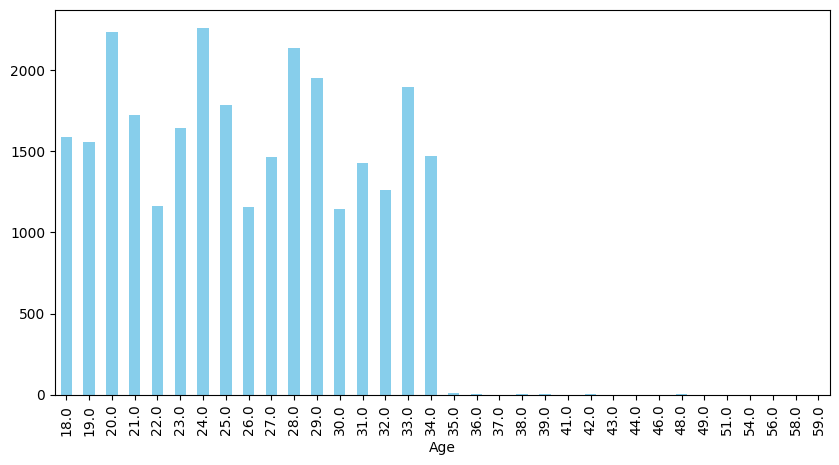

In [4]:
data["Age"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5), color="skyblue")

In [5]:
data["Financial Stress"].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

In [6]:
data["Job Satisfaction"].value_counts() #Se puede observar que al ser estudiantes no trabajan, por lo que se eliminará esta columna.

Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

In [ ]:
data["Depression"].value_counts() #También se eliminará

Depression
1    16336
0    11565
Name: count, dtype: int64

In [8]:
data["Work Pressure"].value_counts()

Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64

In [18]:
data["Degree"].value_counts()

Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
BBA          696
MBBS         696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [12]:
data.isna().sum()  #Para ver si hay datos nulos 

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [13]:
print(data.columns) #Para saber el nombre de las columnas 

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [16]:
data.drop(columns=["id", "Profession", "Job Satisfaction","Work Pressure"], inplace=True)


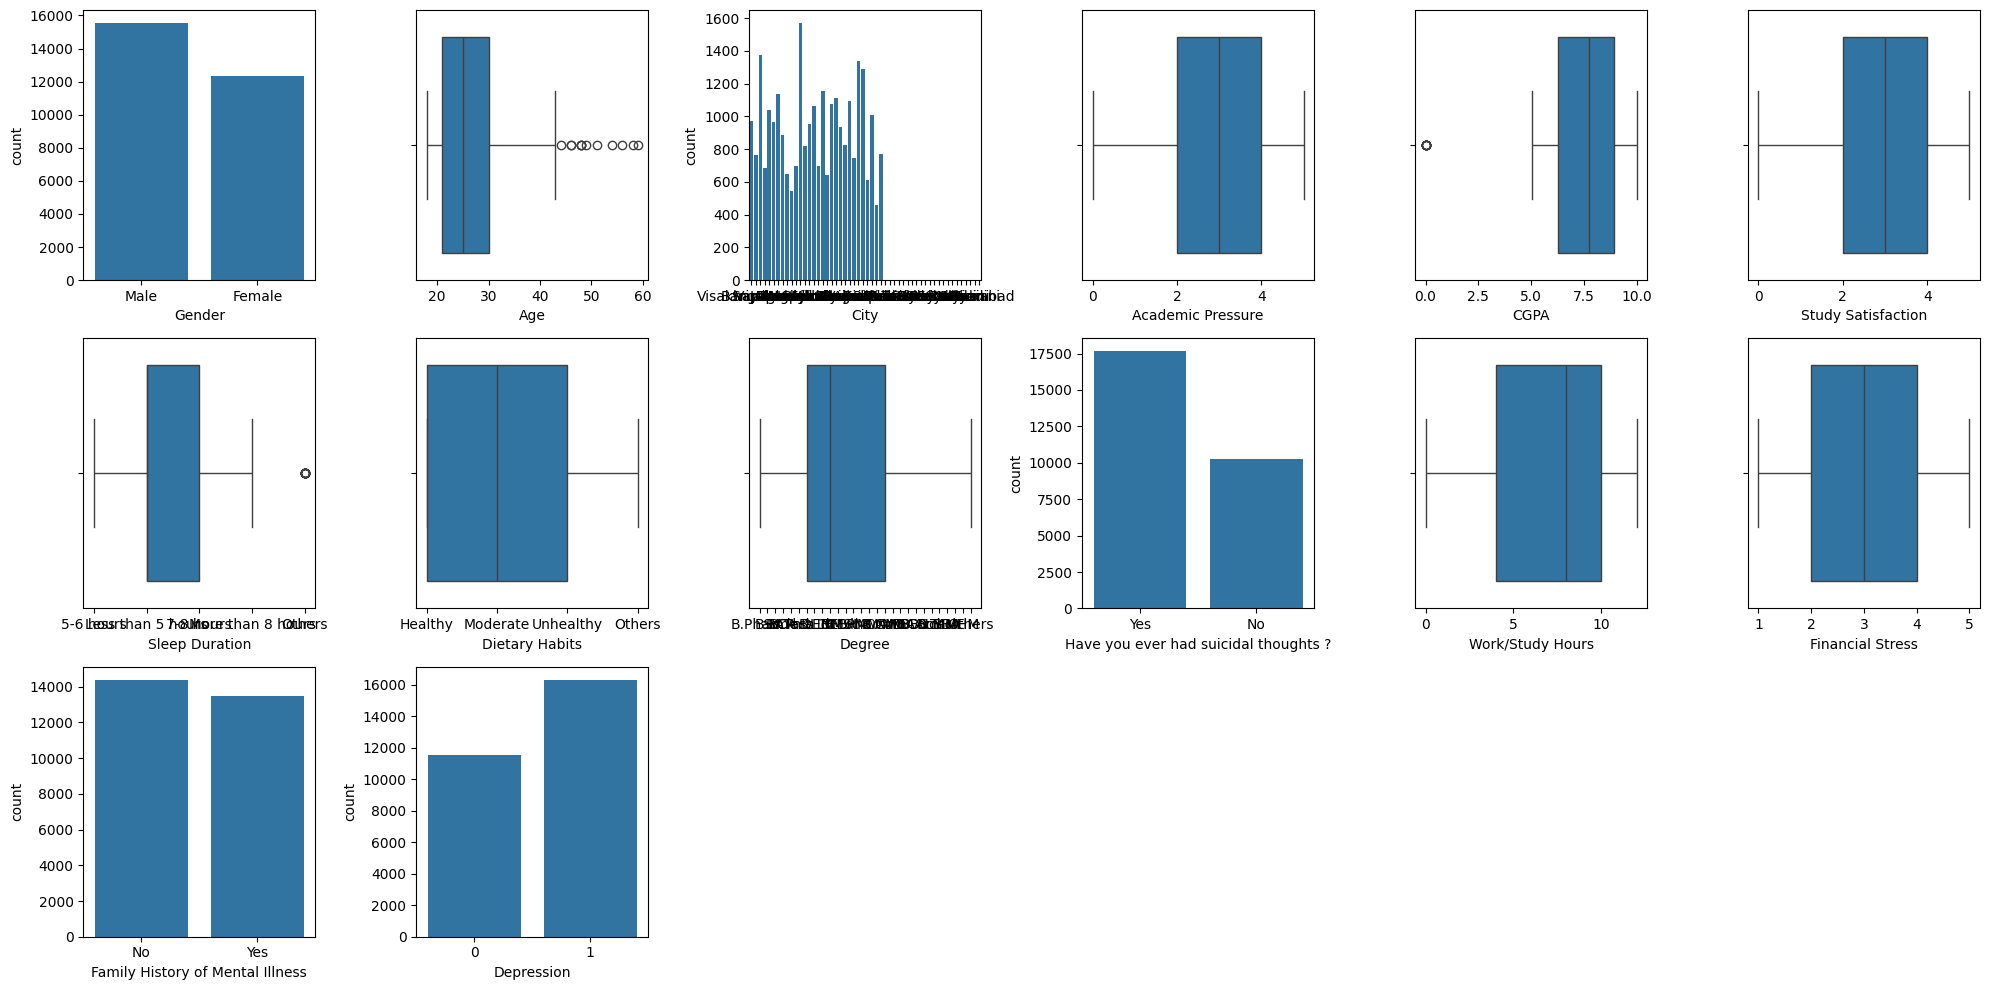

In [17]:

plt.figure(figsize=(20,10)) #Crear figura de 20 x 10
for col in data.columns: #Iterar
    plt.subplot(3 , 6, data.columns.get_loc(col) +1 ) 
    if col == "Gender": #si la columna es la clase
        sns.countplot(data, x = "Gender")
    elif col == "City":
        sns.countplot(data, x = "City")
    elif col == "Have you ever had suicidal thoughts ?": #si la columna es la clase
        sns.countplot(data, x = "Have you ever had suicidal thoughts ?")
    elif col == "Family History of Mental Illness": #si la columna es la clase
        sns.countplot(data, x = "Family History of Mental Illness")
    elif col == "Depression": #si la columna es la clase
        sns.countplot(data, x = "Depression")
    else:
        sns.boxplot(data, x = col) #Mostrar un boxplot
    plt.tight_layout() #Ordenar visualmente
    plt.show

Analisis de los datos

In [22]:
X = data.drop(columns =["Depression"])
y = data["Depression"]

In [23]:
#Matriz de correlación
correlation_matrix = X.corr()
sns.heatmap(X.corr(), annot = True)

ValueError: could not convert string to float: 'Male'